In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_15684\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

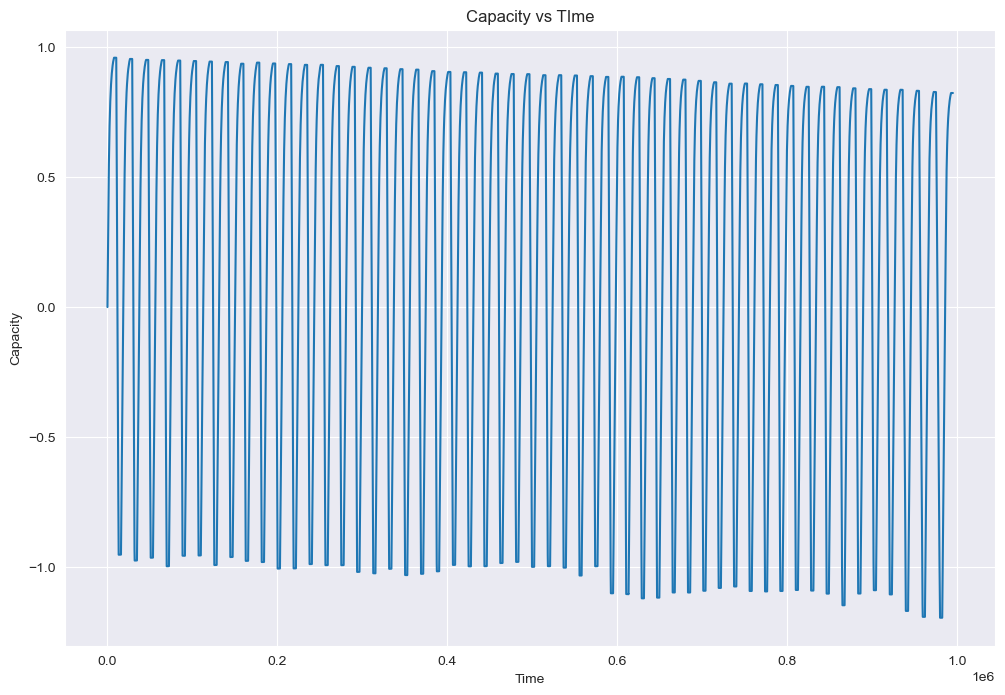

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

CPU times: total: 5min 11s
Wall time: 5min 54s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

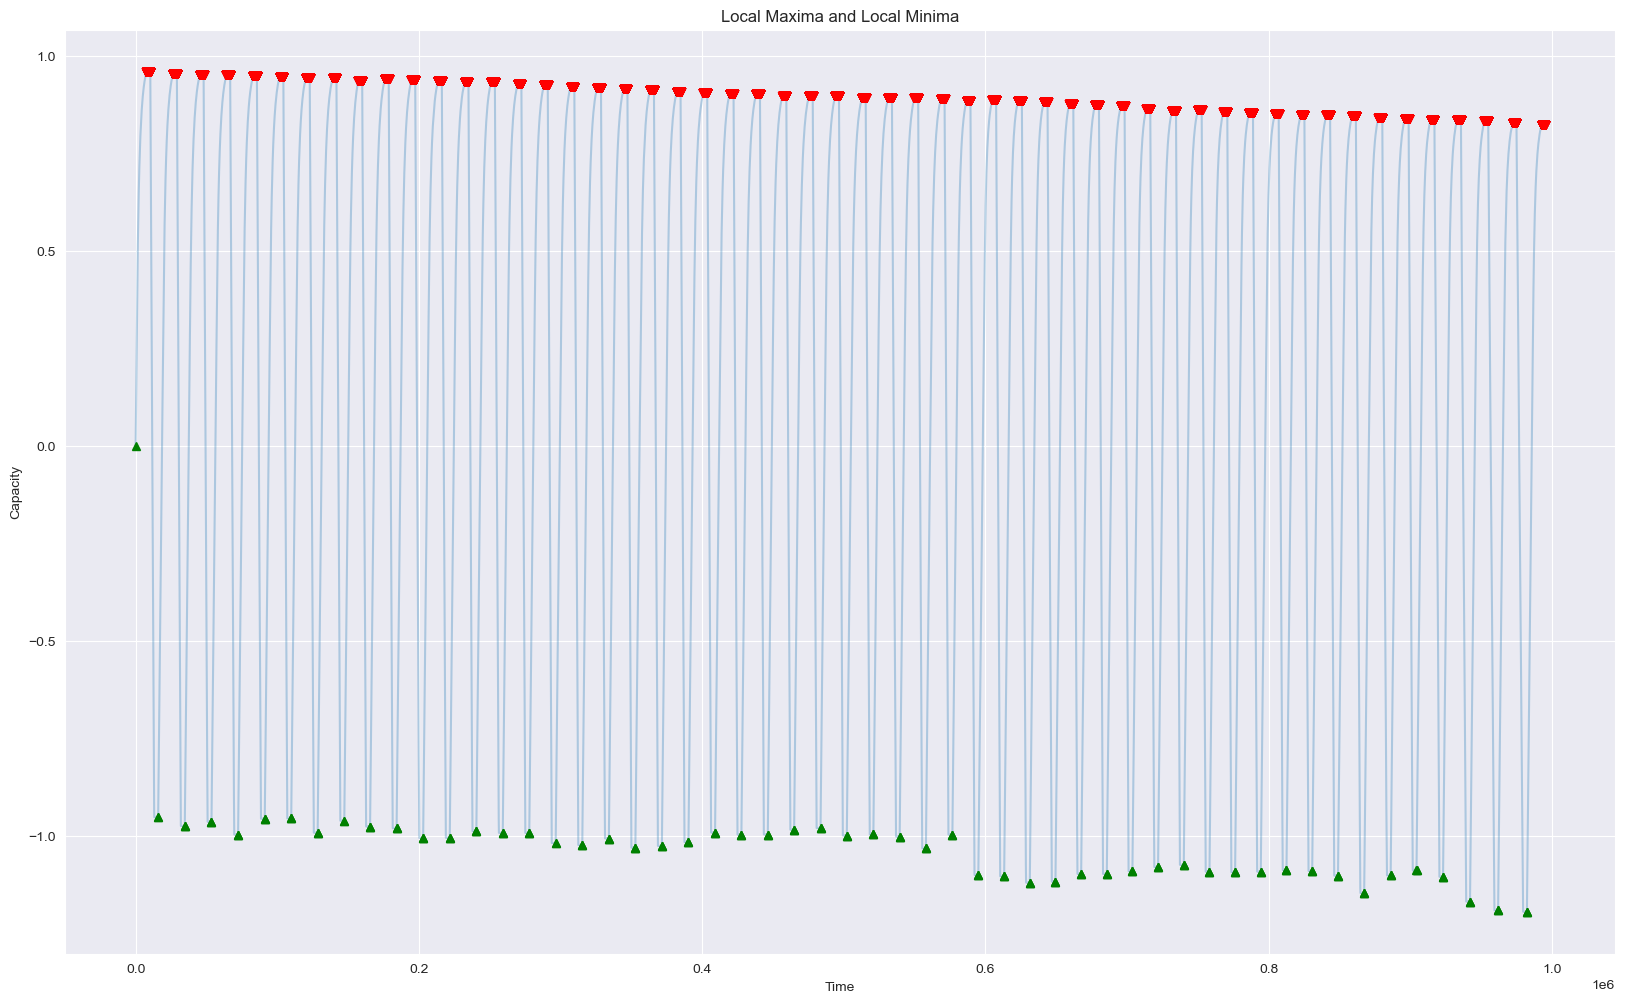

In [15]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [16]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [17]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [18]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [19]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [20]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

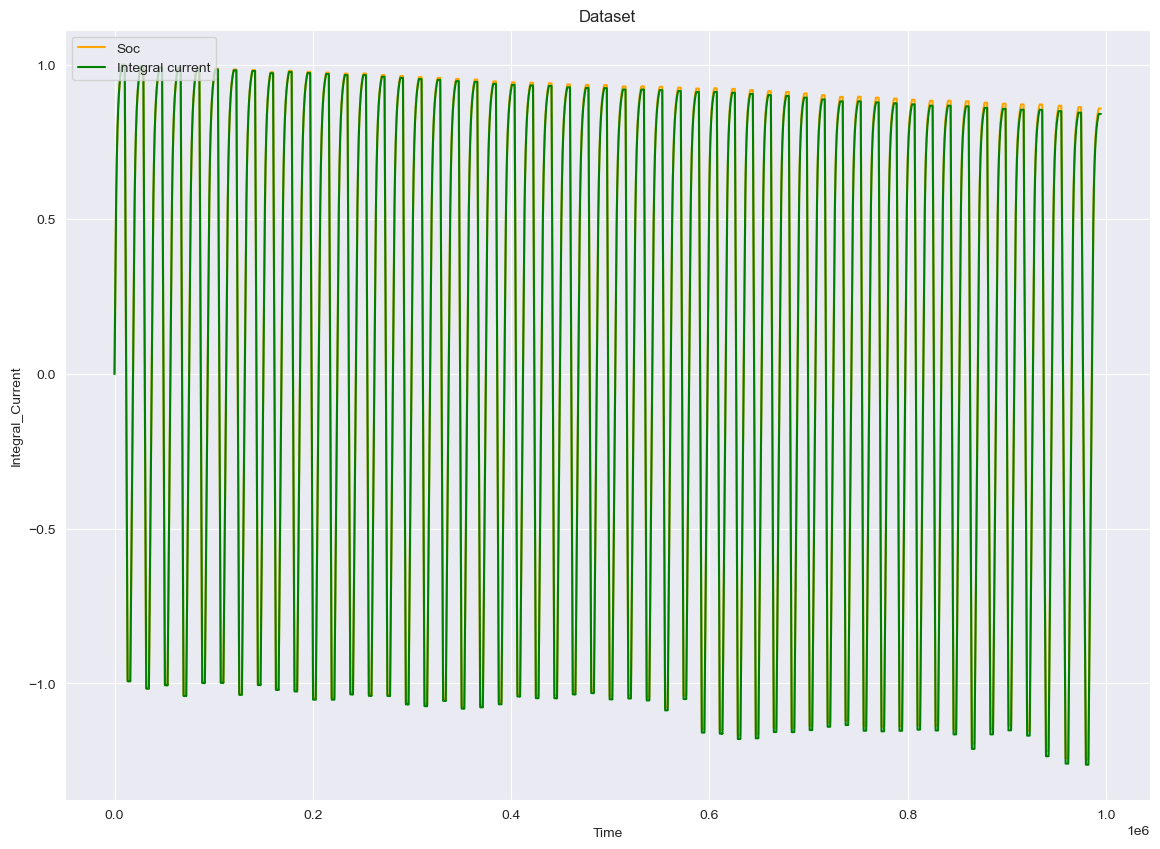

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [22]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [23]:
df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [24]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.285109,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,3.993079,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-9.777741,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,0.000000,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,0.303331,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.339343,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,5.730082,3453.550000,0.999371


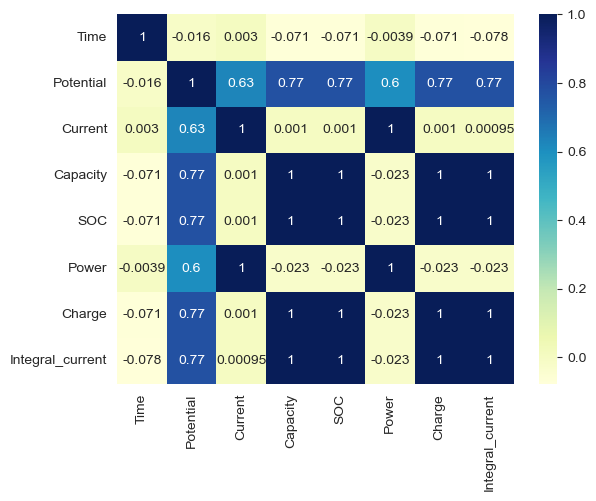

<Figure size 1400x1000 with 0 Axes>

In [25]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [28]:
timest = df.pop('Time')
soc = df.pop("SOC")

KeyError: 'Time'

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [30]:
df.head()

,Potential,Current,Capacity,Power,Charge,Integral_current
0,0.822158,0.969868,0.554717,4.919672,0.554717,0.558203
1,0.824159,0.969847,0.554823,4.922976,0.554823,0.558283
2,0.826242,0.969850,0.554996,4.926784,0.554996,0.558443
3,0.828049,0.969850,0.555148,4.930054,0.555148,0.558602
4,0.829519,0.969850,0.555320,4.932712,0.555320,0.558762


In [31]:
Y = df.pop('Power')
X = df

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [33]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 5), (198976, 5), (795903,), (198976,))

In [117]:
X_train.head(20)

,Potential,Current,Capacity,Charge,Integral_current
903849,0.491688,0.647200,0.049146,0.049146,0.049125
719397,0.456328,0.647200,0.053206,0.053206,0.054229
239278,0.495799,0.647200,0.095725,0.095725,0.100504
831939,0.727467,0.969780,0.248199,0.248199,0.247035
95126,0.999607,0.936773,0.746900,0.746900,0.747899
979913,0.399163,0.647200,0.000001,0.000001,0.000002
880512,0.626043,0.000295,0.842572,0.842572,0.836480
744121,0.985355,0.969643,0.714674,0.714674,0.710345
465338,0.729033,0.969904,0.164923,0.164923,0.167324
417031,0.999621,0.680812,0.948384,0.948384,0.945002


In [35]:
Y_train.head()

903849    0.00000
719397    0.00000
239278    0.00000
831939    4.74707
95126     4.70318
Name: Power, dtype: float64

In [36]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [39]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [40]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 16s 2ms/step - loss: 0.2332 - rmse: 0.4706 - mae: 0.2332 - mse: 0.2215 - mape: 48547824.0000 - val_loss: 0.1988 - val_rmse: 0.3093 - val_mae: 0.1988 - val_mse: 0.0957 - val_mape: 43436904.0000
Epoch 2/100
6218/6218 [==============================] - 16s 2ms/step - loss: 0.2017 - rmse: 0.3070 - mae: 0.2017 - mse: 0.0942 - mape: 41613888.0000 - val_loss: 0.1995 - val_rmse: 0.3147 - val_mae: 0.1995 - val_mse: 0.0990 - val_mape: 38313216.0000
Epoch 3/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.2003 - rmse: 0.3063 - mae: 0.2003 - mse: 0.0938 - mape: 40684948.0000 - val_loss: 0.2017 - val_rmse: 0.2940 - val_mae: 0.2017 - val_mse: 0.0865 - val_mape: 49372508.0000
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1994 - rmse: 0.3057 - mae: 0.1994 - mse: 0.0935 - mape: 40165616.0000 - val_loss: 0.1971 - val_rmse: 0.3023 - val_mae: 0.1971 - val_mse: 0.0914 - val_mape: 37821248.0000


Epoch 34/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1953 - rmse: 0.3048 - mae: 0.1953 - mse: 0.0929 - mape: 34711520.0000 - val_loss: 0.1963 - val_rmse: 0.3021 - val_mae: 0.1963 - val_mse: 0.0913 - val_mape: 39478264.0000
Epoch 35/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1953 - rmse: 0.3048 - mae: 0.1953 - mse: 0.0929 - mape: 34647400.0000 - val_loss: 0.1957 - val_rmse: 0.3157 - val_mae: 0.1957 - val_mse: 0.0996 - val_mape: 30838910.0000
Epoch 36/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1952 - rmse: 0.3049 - mae: 0.1952 - mse: 0.0930 - mape: 34655876.0000 - val_loss: 0.1964 - val_rmse: 0.3087 - val_mae: 0.1964 - val_mse: 0.0953 - val_mape: 29553156.0000
Epoch 37/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1952 - rmse: 0.3048 - mae: 0.1952 - mse: 0.0929 - mape: 34558280.0000 - val_loss: 0.1952 - val_rmse: 0.3061 - val_mae: 0.1952 - val_mse: 0.0937 - val_mape: 33839656.0

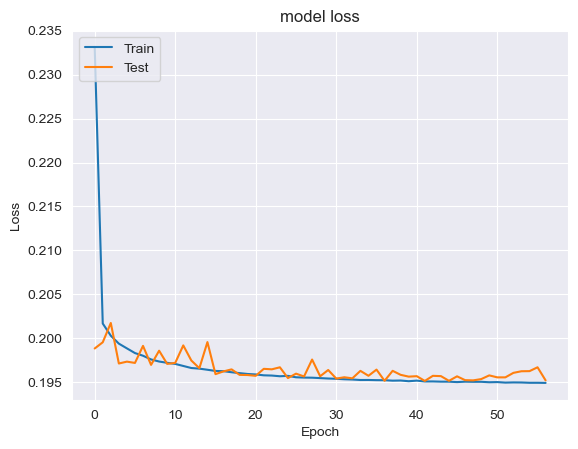

In [41]:
plot_his(history_1)

In [42]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1952 - rmse: 0.3087 - mae: 0.1952 - mse: 0.0953 - mape: 33427872.0000


[0.19520792365074158,
 0.30865123867988586,
 0.19520792365074158,
 0.09526558220386505,
 33427872.0]

In [43]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [44]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                420       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,011
Trainable params: 5,011
Non-trainable params: 0
_________________________________________________________________


In [45]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10051.106


# Model 2

In [46]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0364 - rmse: 0.2500 - mae: 0.0364 - mse: 0.0625 - mape: 6938246.5000 - val_loss: 0.0125 - val_rmse: 0.0488 - val_mae: 0.0125 - val_mse: 0.0024 - val_mape: 1513013.3750
Epoch 2/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0112 - rmse: 0.0458 - mae: 0.0112 - mse: 0.0021 - mape: 1034017.5625 - val_loss: 0.0107 - val_rmse: 0.0444 - val_mae: 0.0107 - val_mse: 0.0020 - val_mape: 1362657.5000
Epoch 3/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0097 - rmse: 0.0425 - mae: 0.0097 - mse: 0.0018 - mape: 782902.2500 - val_loss: 0.0101 - val_rmse: 0.0417 - val_mae: 0.0101 - val_mse: 0.0017 - val_mape: 1488642.5000
Epoch 4/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0089 - rmse: 0.0401 - mae: 0.0089 - mse: 0.0016 - mape: 744048.4375 - val_loss: 0.0086 - val_rmse: 0.0394 - val_mae: 0.0086 - val_mse: 0.0016 - val_mape: 820751.5000
Epo

24872/24872 [==============================] - 58s 2ms/step - loss: 0.0040 - rmse: 0.0224 - mae: 0.0040 - mse: 4.9995e-04 - mape: 408201.3750 - val_loss: 0.0041 - val_rmse: 0.0227 - val_mae: 0.0041 - val_mse: 5.1617e-04 - val_mape: 321691.1875
Epoch 34/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0040 - rmse: 0.0222 - mae: 0.0040 - mse: 4.9482e-04 - mape: 405731.5938 - val_loss: 0.0040 - val_rmse: 0.0226 - val_mae: 0.0040 - val_mse: 5.1039e-04 - val_mape: 377171.6250
Epoch 35/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0039 - rmse: 0.0221 - mae: 0.0039 - mse: 4.9004e-04 - mape: 403465.0000 - val_loss: 0.0039 - val_rmse: 0.0225 - val_mae: 0.0039 - val_mse: 5.0625e-04 - val_mape: 396471.1562
Epoch 36/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0039 - rmse: 0.0220 - mae: 0.0039 - mse: 4.8573e-04 - mape: 401303.8750 - val_loss: 0.0039 - val_rmse: 0.0224 - val_mae: 0.0039 - val_mse: 5.0079e-04 - val_map

Epoch 65/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0034 - rmse: 0.0200 - mae: 0.0034 - mse: 3.9857e-04 - mape: 356275.8750 - val_loss: 0.0035 - val_rmse: 0.0203 - val_mae: 0.0035 - val_mse: 4.1289e-04 - val_mape: 295496.7812
Epoch 66/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0034 - rmse: 0.0199 - mae: 0.0034 - mse: 3.9644e-04 - mape: 355327.7188 - val_loss: 0.0034 - val_rmse: 0.0202 - val_mae: 0.0034 - val_mse: 4.0999e-04 - val_mape: 369523.8125
Epoch 67/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0034 - rmse: 0.0199 - mae: 0.0034 - mse: 3.9435e-04 - mape: 352920.4375 - val_loss: 0.0034 - val_rmse: 0.0202 - val_mae: 0.0034 - val_mse: 4.0761e-04 - val_mape: 395756.2500
Epoch 68/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0034 - rmse: 0.0198 - mae: 0.0034 - mse: 3.9234e-04 - mape: 352732.1562 - val_loss: 0.0034 - val_rmse: 0.0201 - val_mae: 0.0034 - val_mse: 4.0575e

Epoch 97/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0031 - rmse: 0.0186 - mae: 0.0031 - mse: 3.4752e-04 - mape: 314892.8438 - val_loss: 0.0031 - val_rmse: 0.0190 - val_mae: 0.0031 - val_mse: 3.6009e-04 - val_mape: 291021.0000
Epoch 98/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0031 - rmse: 0.0186 - mae: 0.0031 - mse: 3.4638e-04 - mape: 313338.3125 - val_loss: 0.0031 - val_rmse: 0.0189 - val_mae: 0.0031 - val_mse: 3.5905e-04 - val_mape: 300525.3125
Epoch 99/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0031 - rmse: 0.0186 - mae: 0.0031 - mse: 3.4533e-04 - mape: 312507.0625 - val_loss: 0.0031 - val_rmse: 0.0189 - val_mae: 0.0031 - val_mse: 3.5764e-04 - val_mape: 316028.9062
Epoch 100/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0031 - rmse: 0.0186 - mae: 0.0031 - mse: 3.4424e-04 - mape: 311631.8438 - val_loss: 0.0031 - val_rmse: 0.0189 - val_mae: 0.0031 - val_mse: 3.5736

In [47]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 1ms/step - loss: 0.0031 - rmse: 0.0189 - mae: 0.0031 - mse: 3.5736e-04 - mape: 259015.8438


[0.003144051879644394,
 0.018903952091932297,
 0.003144051879644394,
 0.00035735941492021084,
 259015.84375]

In [48]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


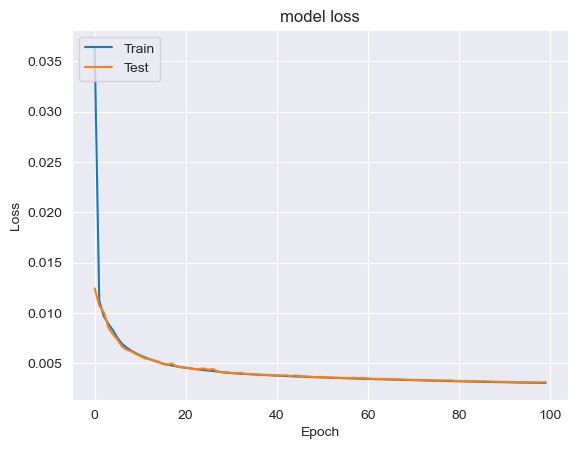

In [49]:
plot_his(history_2)

In [50]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11430.52


# Model 3

In [51]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1105 - rmse: 0.4435 - mae: 0.1105 - mse: 0.1967 - mape: 26488400.0000 - val_loss: 0.0504 - val_rmse: 0.0584 - val_mae: 0.0504 - val_mse: 0.0034 - val_mape: 11110023.0000
Epoch 2/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0283 - rmse: 0.0408 - mae: 0.0283 - mse: 0.0017 - mape: 8006374.0000 - val_loss: 0.0286 - val_rmse: 0.0359 - val_mae: 0.0286 - val_mse: 0.0013 - val_mape: 9750305.0000
Epoch 3/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0172 - rmse: 0.0278 - mae: 0.0172 - mse: 7.7165e-04 - mape: 6436829.5000 - val_loss: 0.0127 - val_rmse: 0.0225 - val_mae: 0.0127 - val_mse: 5.0563e-04 - val_mape: 6419658.5000
Epoch 4/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0137 - rmse: 0.0241 - mae: 0.0137 - mse: 5.8262e-04 - mape: 5712966.5000 - val_loss: 0.0114 - val_rmse: 0.0213 - val_mae: 0.0114 - val_mse: 4.5321e-04 - val_mape: 620

Epoch 33/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0039 - rmse: 0.0128 - mae: 0.0039 - mse: 1.6465e-04 - mape: 1178089.8750 - val_loss: 0.0038 - val_rmse: 0.0124 - val_mae: 0.0038 - val_mse: 1.5424e-04 - val_mape: 917616.3125
Epoch 34/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0039 - rmse: 0.0129 - mae: 0.0039 - mse: 1.6518e-04 - mape: 1134298.8750 - val_loss: 0.0036 - val_rmse: 0.0124 - val_mae: 0.0036 - val_mse: 1.5493e-04 - val_mape: 905868.1250
Epoch 35/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0038 - rmse: 0.0129 - mae: 0.0038 - mse: 1.6592e-04 - mape: 1100716.6250 - val_loss: 0.0036 - val_rmse: 0.0125 - val_mae: 0.0036 - val_mse: 1.5651e-04 - val_mape: 994135.1875
Epoch 36/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0038 - rmse: 0.0129 - mae: 0.0038 - mse: 1.6690e-04 - mape: 1059099.2500 - val_loss: 0.0035 - val_rmse: 0.0126 - val_mae: 0.0035 - val_mse: 1.5815e-04 

6218/6218 [==============================] - 14s 2ms/step - loss: 0.0031 - rmse: 0.0146 - mae: 0.0031 - mse: 2.1459e-04 - mape: 563766.6875 - val_loss: 0.0030 - val_rmse: 0.0144 - val_mae: 0.0030 - val_mse: 2.0633e-04 - val_mape: 519336.4375
Epoch 66/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0031 - rmse: 0.0146 - mae: 0.0031 - mse: 2.1360e-04 - mape: 567379.3125 - val_loss: 0.0029 - val_rmse: 0.0144 - val_mae: 0.0029 - val_mse: 2.0747e-04 - val_mape: 620684.2500
Epoch 67/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0031 - rmse: 0.0146 - mae: 0.0031 - mse: 2.1310e-04 - mape: 574031.8750 - val_loss: 0.0036 - val_rmse: 0.0145 - val_mae: 0.0036 - val_mse: 2.1012e-04 - val_mape: 883888.0625
Epoch 68/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0031 - rmse: 0.0146 - mae: 0.0031 - mse: 2.1264e-04 - mape: 573438.8125 - val_loss: 0.0029 - val_rmse: 0.0144 - val_mae: 0.0029 - val_mse: 2.0612e-04 - val_mape: 61563

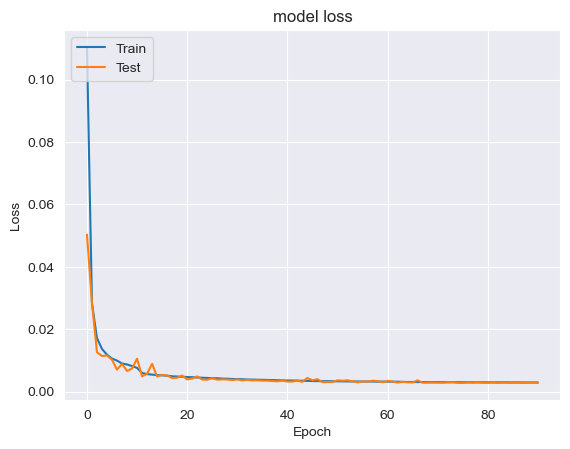

In [52]:
plot_his(history_3)

In [53]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0144 - mae: 0.0029 - mse: 2.0780e-04 - mape: 488015.6250


[0.002886828500777483,
 0.014415177516639233,
 0.002886828500777483,
 0.00020779733313247561,
 488015.625]

In [54]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [55]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9010.509


# Model 4

In [56]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0431 - rmse: 0.2243 - mae: 0.0431 - mse: 0.0503 - mape: 7745261.0000 - val_loss: 0.0122 - val_rmse: 0.0469 - val_mae: 0.0122 - val_mse: 0.0022 - val_mape: 527643.0625
Epoch 2/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0110 - rmse: 0.0435 - mae: 0.0110 - mse: 0.0019 - mape: 632364.5000 - val_loss: 0.0112 - val_rmse: 0.0407 - val_mae: 0.0112 - val_mse: 0.0017 - val_mape: 1022401.5000
Epoch 3/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0090 - rmse: 0.0383 - mae: 0.0090 - mse: 0.0015 - mape: 374520.6875 - val_loss: 0.0081 - val_rmse: 0.0358 - val_mae: 0.0081 - val_mse: 0.0013 - val_mape: 246934.1562
Epoch 4/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0080 - rmse: 0.0344 - mae: 0.0080 - mse: 0.0012 - mape: 276953.6562 - val_loss: 0.0073 - val_rmse: 0.0322 - val_mae: 0.0073 - val_mse: 0.0010 - val_mape: 159299.2188
Epoch 

24872/24872 [==============================] - 60s 2ms/step - loss: 0.0041 - rmse: 0.0209 - mae: 0.0041 - mse: 4.3606e-04 - mape: 391682.4375 - val_loss: 0.0041 - val_rmse: 0.0205 - val_mae: 0.0041 - val_mse: 4.2087e-04 - val_mape: 473126.2188
Epoch 34/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0040 - rmse: 0.0209 - mae: 0.0040 - mse: 4.3504e-04 - mape: 397761.2188 - val_loss: 0.0039 - val_rmse: 0.0206 - val_mae: 0.0039 - val_mse: 4.2243e-04 - val_mape: 397178.5312
Epoch 35/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0040 - rmse: 0.0209 - mae: 0.0040 - mse: 4.3601e-04 - mape: 402234.0938 - val_loss: 0.0039 - val_rmse: 0.0206 - val_mae: 0.0039 - val_mse: 4.2245e-04 - val_mape: 384090.1250
Epoch 36/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0040 - rmse: 0.0209 - mae: 0.0040 - mse: 4.3582e-04 - mape: 405498.4688 - val_loss: 0.0039 - val_rmse: 0.0205 - val_mae: 0.0039 - val_mse: 4.2222e-04 - val_map

Epoch 65/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0038 - rmse: 0.0206 - mae: 0.0038 - mse: 4.2633e-04 - mape: 381989.4375 - val_loss: 0.0038 - val_rmse: 0.0203 - val_mae: 0.0038 - val_mse: 4.1285e-04 - val_mape: 336047.0312
Epoch 66/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0038 - rmse: 0.0206 - mae: 0.0038 - mse: 4.2551e-04 - mape: 381653.4688 - val_loss: 0.0037 - val_rmse: 0.0203 - val_mae: 0.0037 - val_mse: 4.1172e-04 - val_mape: 422039.6250
Epoch 67/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0038 - rmse: 0.0206 - mae: 0.0038 - mse: 4.2523e-04 - mape: 380795.4062 - val_loss: 0.0037 - val_rmse: 0.0203 - val_mae: 0.0037 - val_mse: 4.1187e-04 - val_mape: 403686.7188
Epoch 68/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0038 - rmse: 0.0206 - mae: 0.0038 - mse: 4.2470e-04 - mape: 379814.4375 - val_loss: 0.0037 - val_rmse: 0.0203 - val_mae: 0.0037 - val_mse: 4.1229e

Epoch 97/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0037 - rmse: 0.0205 - mae: 0.0037 - mse: 4.1977e-04 - mape: 366974.5000 - val_loss: 0.0036 - val_rmse: 0.0202 - val_mae: 0.0036 - val_mse: 4.0647e-04 - val_mape: 377557.8438
Epoch 98/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0037 - rmse: 0.0205 - mae: 0.0037 - mse: 4.1921e-04 - mape: 366989.3438 - val_loss: 0.0036 - val_rmse: 0.0202 - val_mae: 0.0036 - val_mse: 4.0660e-04 - val_mape: 371706.6875
Epoch 99/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0037 - rmse: 0.0205 - mae: 0.0037 - mse: 4.1946e-04 - mape: 366231.5312 - val_loss: 0.0036 - val_rmse: 0.0202 - val_mae: 0.0036 - val_mse: 4.0635e-04 - val_mape: 380430.9375
Epoch 100/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0037 - rmse: 0.0205 - mae: 0.0037 - mse: 4.1919e-04 - mape: 366821.4375 - val_loss: 0.0037 - val_rmse: 0.0202 - val_mae: 0.0037 - val_mse: 4.0676

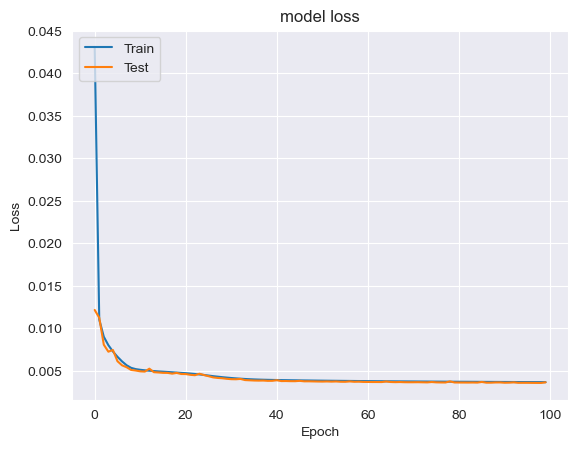

In [57]:
plot_his(history_4)

In [58]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0037 - rmse: 0.0202 - mae: 0.0037 - mse: 4.0676e-04 - mape: 310071.1562


[0.003651977749541402,
 0.020168401300907135,
 0.003651977749541402,
 0.0004067644476890564,
 310071.15625]

In [59]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [60]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23570.514


# Model 5

In [61]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 190s 7ms/step - loss: 0.1533 - rmse: 0.4163 - mae: 0.1533 - mse: 0.1733 - mape: 34095244.0000 - val_loss: 0.0445 - val_rmse: 0.0872 - val_mae: 0.0445 - val_mse: 0.0076 - val_mape: 15155470.0000
Epoch 2/50
24872/24872 [==============================] - 176s 7ms/step - loss: 0.0324 - rmse: 0.0529 - mae: 0.0324 - mse: 0.0028 - mape: 10648420.0000 - val_loss: 0.0174 - val_rmse: 0.0278 - val_mae: 0.0174 - val_mse: 7.7034e-04 - val_mape: 5128007.5000
Epoch 3/50
24872/24872 [==============================] - 180s 7ms/step - loss: 0.0182 - rmse: 0.0256 - mae: 0.0182 - mse: 6.5313e-04 - mape: 5383414.5000 - val_loss: 0.0185 - val_rmse: 0.0218 - val_mae: 0.0185 - val_mse: 4.7387e-04 - val_mape: 4973531.0000
Epoch 4/50
24872/24872 [==============================] - 182s 7ms/step - loss: 0.0126 - rmse: 0.0170 - mae: 0.0126 - mse: 2.8824e-04 - mape: 3213529.2500 - val_loss: 0.0135 - val_rmse: 0.0165 - val_mae: 0.0135 - val_mse: 2.7322e-04 - 

Epoch 33/50
24872/24872 [==============================] - 162s 7ms/step - loss: 0.0031 - rmse: 0.0044 - mae: 0.0031 - mse: 1.9497e-05 - mape: 735235.2500 - val_loss: 0.0028 - val_rmse: 0.0041 - val_mae: 0.0028 - val_mse: 1.7162e-05 - val_mape: 627598.0625
Epoch 34/50
24872/24872 [==============================] - 162s 7ms/step - loss: 0.0030 - rmse: 0.0044 - mae: 0.0030 - mse: 1.9064e-05 - mape: 728140.0625 - val_loss: 0.0027 - val_rmse: 0.0039 - val_mae: 0.0027 - val_mse: 1.5426e-05 - val_mape: 575252.5625
Epoch 35/50
24872/24872 [==============================] - 161s 6ms/step - loss: 0.0030 - rmse: 0.0043 - mae: 0.0030 - mse: 1.8549e-05 - mape: 713038.1250 - val_loss: 0.0033 - val_rmse: 0.0044 - val_mae: 0.0033 - val_mse: 1.9483e-05 - val_mape: 807192.8750
Epoch 36/50
24872/24872 [==============================] - 161s 6ms/step - loss: 0.0030 - rmse: 0.0043 - mae: 0.0030 - mse: 1.8354e-05 - mape: 709371.5625 - val_loss: 0.0035 - val_rmse: 0.0047 - val_mae: 0.0035 - val_mse: 2.1986e

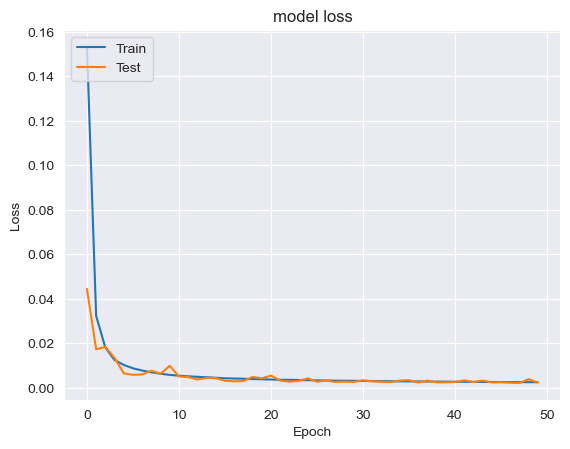

In [62]:
plot_his(history_5)

In [63]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 33s 5ms/step - loss: 0.0024 - rmse: 0.0039 - mae: 0.0024 - mse: 1.5049e-05 - mape: 534399.7500


[0.0024372104089707136,
 0.003879362717270851,
 0.0024372104089707136,
 1.5049454304971732e-05,
 534399.75]

In [64]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 16s 3ms/step


In [66]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25730.492


# Model 6

In [67]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 182s 7ms/step - loss: 0.1149 - rmse: 0.3634 - mae: 0.1149 - mse: 0.1321 - mape: 24334344.0000 - val_loss: 0.0278 - val_rmse: 0.0350 - val_mae: 0.0278 - val_mse: 0.0012 - val_mape: 9405676.0000
Epoch 2/40
24872/24872 [==============================] - 171s 7ms/step - loss: 0.0212 - rmse: 0.0300 - mae: 0.0212 - mse: 8.9732e-04 - mape: 5373553.5000 - val_loss: 0.0152 - val_rmse: 0.0191 - val_mae: 0.0152 - val_mse: 3.6652e-04 - val_mape: 2811413.5000
Epoch 3/40
24872/24872 [==============================] - 170s 7ms/step - loss: 0.0133 - rmse: 0.0183 - mae: 0.0133 - mse: 3.3555e-04 - mape: 3301649.2500 - val_loss: 0.0050 - val_rmse: 0.0093 - val_mae: 0.0050 - val_mse: 8.6056e-05 - val_mape: 862354.5000
Epoch 4/40
24872/24872 [==============================] - 171s 7ms/step - loss: 0.0100 - rmse: 0.0138 - mae: 0.0100 - mse: 1.8977e-04 - mape: 2412548.7500 - val_loss: 0.0063 - val_rmse: 0.0092 - val_mae: 0.0063 - val_mse: 8.4108e-05 -

Epoch 33/40
24872/24872 [==============================] - 175s 7ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1619e-05 - mape: 641410.6250 - val_loss: 0.0035 - val_rmse: 0.0050 - val_mae: 0.0035 - val_mse: 2.4676e-05 - val_mape: 768404.1250
Epoch 34/40
24872/24872 [==============================] - 182s 7ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1311e-05 - mape: 638629.1875 - val_loss: 0.0031 - val_rmse: 0.0047 - val_mae: 0.0031 - val_mse: 2.1775e-05 - val_mape: 766298.0000
Epoch 35/40
24872/24872 [==============================] - 192s 8ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.0947e-05 - mape: 629769.5000 - val_loss: 0.0025 - val_rmse: 0.0043 - val_mae: 0.0025 - val_mse: 1.8335e-05 - val_mape: 533258.6875
Epoch 36/40
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0029 - rmse: 0.0045 - mae: 0.0029 - mse: 2.0656e-05 - mape: 627137.4375 - val_loss: 0.0030 - val_rmse: 0.0046 - val_mae: 0.0030 - val_mse: 2.1213e

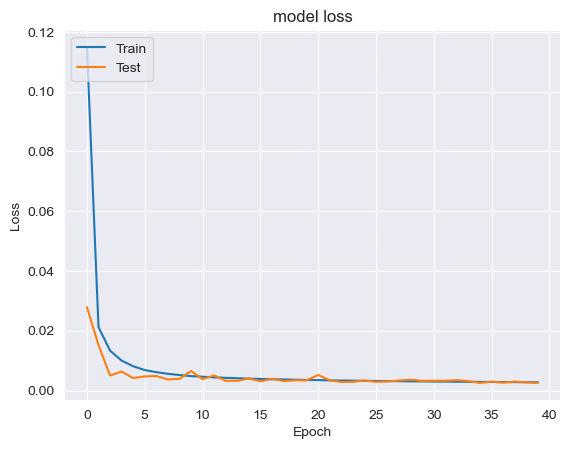

In [68]:
plot_his(history_6)

In [69]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 0.0025 - rmse: 0.0043 - mae: 0.0025 - mse: 1.8302e-05 - mape: 517872.4375


[0.002544520189985633,
 0.004278075415641069,
 0.002544520189985633,
 1.8301927411812358e-05,
 517872.4375]

In [70]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [71]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [72]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65870.5


# Model 7

In [73]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 54s 7ms/step - loss: 0.3031 - rmse: 0.7372 - mae: 0.3031 - mse: 0.5435 - mape: 51761984.0000 - val_loss: 0.1728 - val_rmse: 0.2618 - val_mae: 0.1728 - val_mse: 0.0685 - val_mape: 38975188.0000
Epoch 2/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.1548 - rmse: 0.2385 - mae: 0.1548 - mse: 0.0569 - mape: 34553980.0000 - val_loss: 0.1184 - val_rmse: 0.1916 - val_mae: 0.1184 - val_mse: 0.0367 - val_mape: 26300850.0000
Epoch 3/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0927 - rmse: 0.1588 - mae: 0.0927 - mse: 0.0252 - mape: 21797940.0000 - val_loss: 0.0884 - val_rmse: 0.1285 - val_mae: 0.0884 - val_mse: 0.0165 - val_mape: 21965228.0000
Epoch 4/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0591 - rmse: 0.0999 - mae: 0.0591 - mse: 0.0100 - mape: 16228670.0000 - val_loss: 0.0377 - val_rmse: 0.0753 - val_mae: 0.0377 - val_mse: 0.0057 - val_mape: 10415944.0000
Epoc

6218/6218 [==============================] - 45s 7ms/step - loss: 0.0103 - rmse: 0.0210 - mae: 0.0103 - mse: 4.4212e-04 - mape: 2639224.2500 - val_loss: 0.0111 - val_rmse: 0.0215 - val_mae: 0.0111 - val_mse: 4.6258e-04 - val_mape: 2942449.7500
Epoch 34/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0101 - rmse: 0.0206 - mae: 0.0101 - mse: 4.2573e-04 - mape: 2533537.2500 - val_loss: 0.0101 - val_rmse: 0.0207 - val_mae: 0.0101 - val_mse: 4.2696e-04 - val_mape: 2566581.2500
Epoch 35/70
6218/6218 [==============================] - 43s 7ms/step - loss: 0.0100 - rmse: 0.0204 - mae: 0.0100 - mse: 4.1513e-04 - mape: 2473258.0000 - val_loss: 0.0117 - val_rmse: 0.0216 - val_mae: 0.0117 - val_mse: 4.6743e-04 - val_mape: 3099096.2500
Epoch 36/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0097 - rmse: 0.0200 - mae: 0.0097 - mse: 4.0005e-04 - mape: 2375657.2500 - val_loss: 0.0086 - val_rmse: 0.0197 - val_mae: 0.0086 - val_mse: 3.8892e-04 - val_mape: 1

6218/6218 [==============================] - 43s 7ms/step - loss: 0.0068 - rmse: 0.0150 - mae: 0.0068 - mse: 2.2595e-04 - mape: 1133167.1250 - val_loss: 0.0064 - val_rmse: 0.0151 - val_mae: 0.0064 - val_mse: 2.2905e-04 - val_mape: 846346.8750
Epoch 66/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0068 - rmse: 0.0150 - mae: 0.0068 - mse: 2.2404e-04 - mape: 1122992.7500 - val_loss: 0.0064 - val_rmse: 0.0150 - val_mae: 0.0064 - val_mse: 2.2574e-04 - val_mape: 1038600.8125
Epoch 67/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0067 - rmse: 0.0149 - mae: 0.0067 - mse: 2.2117e-04 - mape: 1095975.3750 - val_loss: 0.0083 - val_rmse: 0.0157 - val_mae: 0.0083 - val_mse: 2.4498e-04 - val_mape: 1668345.5000
Epoch 68/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.0067 - rmse: 0.0148 - mae: 0.0067 - mse: 2.1886e-04 - mape: 1086371.7500 - val_loss: 0.0063 - val_rmse: 0.0147 - val_mae: 0.0063 - val_mse: 2.1627e-04 - val_mape: 89

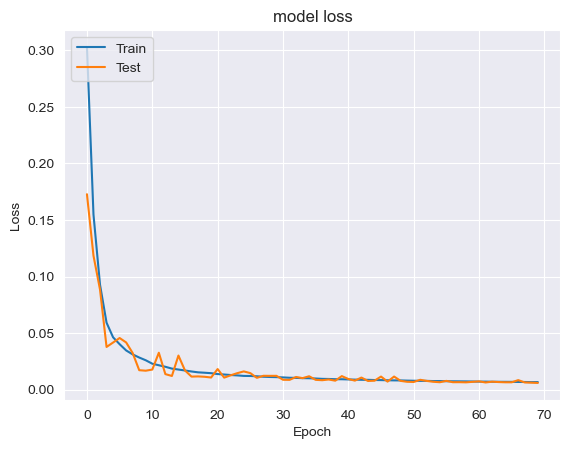

In [74]:
plot_his(history_7)

In [75]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 16s 2ms/step


In [76]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 19s 3ms/step - loss: 0.0058 - rmse: 0.0146 - mae: 0.0058 - mse: 2.1177e-04 - mape: 750147.6875


[0.005840668920427561,
 0.014552408829331398,
 0.005840668920427561,
 0.00021177259623073041,
 750147.6875]

In [77]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [78]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11230.509


# Model 8

In [79]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 109s 8ms/step - loss: 0.2204 - rmse: 0.5064 - mae: 0.2204 - mse: 0.2564 - mape: 44623236.0000 - val_loss: 0.1589 - val_rmse: 0.2415 - val_mae: 0.1589 - val_mse: 0.0583 - val_mape: 34567660.0000
Epoch 2/40
12436/12436 [==============================] - 104s 8ms/step - loss: 0.1302 - rmse: 0.2051 - mae: 0.1302 - mse: 0.0421 - mape: 29382626.0000 - val_loss: 0.1081 - val_rmse: 0.1729 - val_mae: 0.1081 - val_mse: 0.0299 - val_mape: 23758914.0000
Epoch 3/40
12436/12436 [==============================] - 104s 8ms/step - loss: 0.0892 - rmse: 0.1501 - mae: 0.0892 - mse: 0.0225 - mape: 20507542.0000 - val_loss: 0.0683 - val_rmse: 0.1261 - val_mae: 0.0683 - val_mse: 0.0159 - val_mape: 16294968.0000
Epoch 4/40
12436/12436 [==============================] - 104s 8ms/step - loss: 0.0553 - rmse: 0.1075 - mae: 0.0553 - mse: 0.0115 - mape: 13570487.0000 - val_loss: 0.0453 - val_rmse: 0.0954 - val_mae: 0.0453 - val_mse: 0.0091 - val_mape: 112082

Epoch 34/40
12436/12436 [==============================] - 106s 9ms/step - loss: 0.0121 - rmse: 0.0368 - mae: 0.0121 - mse: 0.0014 - mape: 4818811.0000 - val_loss: 0.0118 - val_rmse: 0.0372 - val_mae: 0.0118 - val_mse: 0.0014 - val_mape: 4628613.5000
Epoch 35/40
12436/12436 [==============================] - 103s 8ms/step - loss: 0.0120 - rmse: 0.0365 - mae: 0.0120 - mse: 0.0013 - mape: 4766841.5000 - val_loss: 0.0117 - val_rmse: 0.0370 - val_mae: 0.0117 - val_mse: 0.0014 - val_mape: 4513138.0000
Epoch 36/40
12436/12436 [==============================] - 106s 9ms/step - loss: 0.0119 - rmse: 0.0362 - mae: 0.0119 - mse: 0.0013 - mape: 4712671.5000 - val_loss: 0.0116 - val_rmse: 0.0367 - val_mae: 0.0116 - val_mse: 0.0013 - val_mape: 4466278.5000
Epoch 37/40
12436/12436 [==============================] - 104s 8ms/step - loss: 0.0118 - rmse: 0.0360 - mae: 0.0118 - mse: 0.0013 - mape: 4660509.0000 - val_loss: 0.0116 - val_rmse: 0.0362 - val_mae: 0.0116 - val_mse: 0.0013 - val_mape: 4643856.0

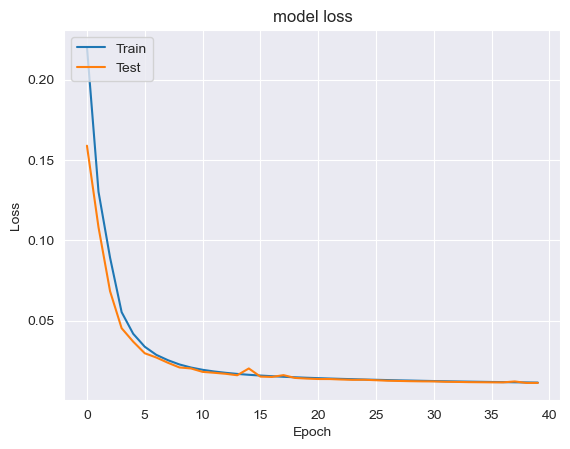

In [80]:
plot_his(history_8)

In [81]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [82]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 30s 5ms/step - loss: 0.0113 - rmse: 0.0356 - mae: 0.0113 - mse: 0.0013 - mape: 4453590.5000


[0.011294540949165821,
 0.035631075501441956,
 0.011294540949165821,
 0.0012695735786110163,
 4453590.5]

In [83]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65870.516


# Model 9

In [84]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0671 - rmse: 0.3980 - mae: 0.0671 - mse: 0.1584 - mape: 14064318.0000 - val_loss: 0.0203 - val_rmse: 0.0329 - val_mae: 0.0203 - val_mse: 0.0011 - val_mape: 6819840.5000
Epoch 2/50
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0168 - rmse: 0.0272 - mae: 0.0168 - mse: 7.3748e-04 - mape: 5978210.5000 - val_loss: 0.0127 - val_rmse: 0.0214 - val_mae: 0.0127 - val_mse: 4.5953e-04 - val_mape: 3832420.2500
Epoch 3/50
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0129 - rmse: 0.0214 - mae: 0.0129 - mse: 4.5696e-04 - mape: 3925197.5000 - val_loss: 0.0125 - val_rmse: 0.0206 - val_mae: 0.0125 - val_mse: 4.2249e-04 - val_mape: 3709569.2500
Epoch 4/50
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0121 - rmse: 0.0209 - mae: 0.0121 - mse: 4.3767e-04 - mape: 3823764.0000 - val_loss: 0.0111 - val_rmse: 0.0205 - val_mae: 0.0111 - val_mse: 4.2042e-04 - va

Epoch 33/50
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0042 - rmse: 0.0115 - mae: 0.0042 - mse: 1.3192e-04 - mape: 288171.6875 - val_loss: 0.0043 - val_rmse: 0.0114 - val_mae: 0.0043 - val_mse: 1.3020e-04 - val_mape: 416753.5625
Epoch 34/50
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0041 - rmse: 0.0115 - mae: 0.0041 - mse: 1.3122e-04 - mape: 283832.2812 - val_loss: 0.0041 - val_rmse: 0.0114 - val_mae: 0.0041 - val_mse: 1.2914e-04 - val_mape: 292045.1562
Epoch 35/50
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0041 - rmse: 0.0114 - mae: 0.0041 - mse: 1.3060e-04 - mape: 281565.0625 - val_loss: 0.0040 - val_rmse: 0.0113 - val_mae: 0.0040 - val_mse: 1.2820e-04 - val_mape: 257377.2031
Epoch 36/50
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0041 - rmse: 0.0114 - mae: 0.0041 - mse: 1.3000e-04 - mape: 277574.4062 - val_loss: 0.0043 - val_rmse: 0.0114 - val_mae: 0.0043 - val_mse: 1.3011e-04 

In [85]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0037 - rmse: 0.0109 - mae: 0.0037 - mse: 1.1898e-04 - mape: 279179.5625


[0.0037300956901162863,
 0.010907921940088272,
 0.0037300956901162863,
 0.00011898275988642126,
 279179.5625]

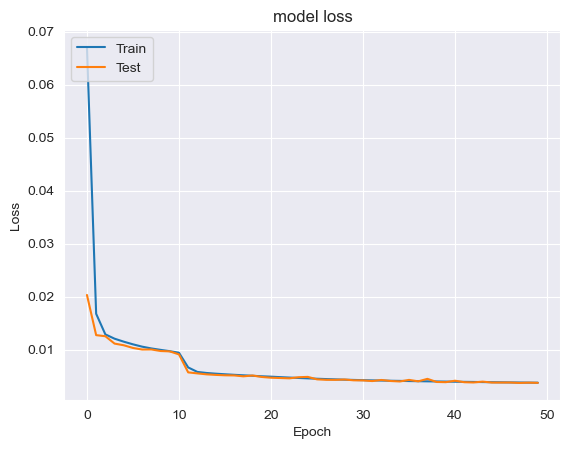

In [86]:
plot_his(history_9)

In [87]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [88]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  750.50354


# Model 10

In [89]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0334 - rmse: 0.2418 - mae: 0.0334 - mse: 0.0585 - mape: 6879407.5000 - val_loss: 0.0102 - val_rmse: 0.0151 - val_mae: 0.0102 - val_mse: 2.2686e-04 - val_mape: 3951826.2500
Epoch 2/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0078 - rmse: 0.0125 - mae: 0.0078 - mse: 1.5728e-04 - mape: 2075209.7500 - val_loss: 0.0073 - val_rmse: 0.0115 - val_mae: 0.0073 - val_mse: 1.3209e-04 - val_mape: 2938986.0000
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0058 - rmse: 0.0102 - mae: 0.0058 - mse: 1.0390e-04 - mape: 1496627.1250 - val_loss: 0.0057 - val_rmse: 0.0102 - val_mae: 0.0057 - val_mse: 1.0375e-04 - val_mape: 757719.0000
Epoch 4/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0049 - rmse: 0.0093 - mae: 0.0049 - mse: 8.5668e-05 - mape: 1228456.3750 - val_loss: 0.0058 - val_rmse: 0.0097 - val_mae: 0.0058 - val_mse: 9.3186e-0

Epoch 33/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0019 - rmse: 0.0079 - mae: 0.0019 - mse: 6.2759e-05 - mape: 322355.0000 - val_loss: 0.0018 - val_rmse: 0.0080 - val_mae: 0.0018 - val_mse: 6.3990e-05 - val_mape: 335954.1250
Epoch 34/100
24872/24872 [==============================] - 126s 5ms/step - loss: 0.0019 - rmse: 0.0079 - mae: 0.0019 - mse: 6.2754e-05 - mape: 314628.2188 - val_loss: 0.0019 - val_rmse: 0.0080 - val_mae: 0.0019 - val_mse: 6.3575e-05 - val_mape: 254187.0312
Epoch 35/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0019 - rmse: 0.0079 - mae: 0.0019 - mse: 6.2658e-05 - mape: 306945.0625 - val_loss: 0.0018 - val_rmse: 0.0080 - val_mae: 0.0018 - val_mse: 6.4311e-05 - val_mape: 252314.1562
Epoch 36/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0019 - rmse: 0.0079 - mae: 0.0019 - mse: 6.2812e-05 - mape: 301664.2812 - val_loss: 0.0018 - val_rmse: 0.0080 - val_mae: 0.0018 - val_mse: 6.4777

Epoch 65/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0015 - rmse: 0.0079 - mae: 0.0015 - mse: 6.1907e-05 - mape: 164593.0938 - val_loss: 0.0015 - val_rmse: 0.0080 - val_mae: 0.0015 - val_mse: 6.3652e-05 - val_mape: 159881.8750
Epoch 66/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0015 - rmse: 0.0079 - mae: 0.0015 - mse: 6.1788e-05 - mape: 161686.6406 - val_loss: 0.0015 - val_rmse: 0.0080 - val_mae: 0.0015 - val_mse: 6.3600e-05 - val_mape: 133591.6875
Epoch 67/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0015 - rmse: 0.0079 - mae: 0.0015 - mse: 6.1695e-05 - mape: 160583.0938 - val_loss: 0.0015 - val_rmse: 0.0080 - val_mae: 0.0015 - val_mse: 6.3507e-05 - val_mape: 139525.9531
Epoch 68/100
24872/24872 [==============================] - 62s 3ms/step - loss: 0.0015 - rmse: 0.0078 - mae: 0.0015 - mse: 6.1614e-05 - mape: 157844.8438 - val_loss: 0.0016 - val_rmse: 0.0080 - val_mae: 0.0016 - val_mse: 6.3625e

Epoch 97/100
24872/24872 [==============================] - 95s 4ms/step - loss: 0.0014 - rmse: 0.0076 - mae: 0.0014 - mse: 5.8326e-05 - mape: 116379.3984 - val_loss: 0.0013 - val_rmse: 0.0078 - val_mae: 0.0013 - val_mse: 6.0647e-05 - val_mape: 124685.4922
Epoch 98/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0014 - rmse: 0.0076 - mae: 0.0014 - mse: 5.8285e-05 - mape: 115633.2812 - val_loss: 0.0014 - val_rmse: 0.0078 - val_mae: 0.0014 - val_mse: 6.0358e-05 - val_mape: 133985.4219
Epoch 99/100
24872/24872 [==============================] - 111s 4ms/step - loss: 0.0014 - rmse: 0.0076 - mae: 0.0014 - mse: 5.8144e-05 - mape: 115127.0469 - val_loss: 0.0015 - val_rmse: 0.0077 - val_mae: 0.0015 - val_mse: 6.0036e-05 - val_mape: 132357.4531
Epoch 100/100
24872/24872 [==============================] - 87s 4ms/step - loss: 0.0014 - rmse: 0.0076 - mae: 0.0014 - mse: 5.8031e-05 - mape: 113543.9688 - val_loss: 0.0014 - val_rmse: 0.0078 - val_mae: 0.0014 - val_mse: 6.018

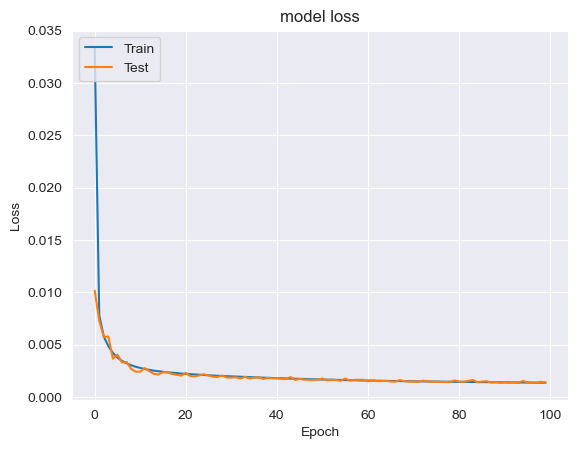

In [90]:
plot_his(history_10)

In [91]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0014 - rmse: 0.0078 - mae: 0.0014 - mse: 6.0186e-05 - mape: 145795.8438


[0.0014024156844243407,
 0.007757939863950014,
 0.0014024156844243407,
 6.018563362886198e-05,
 145795.84375]

In [92]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [93]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  1990.5077


In [116]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 10)             30        
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 10)             310       
                                                                 
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                420       
                                                                 
 dense_24 (Dense)            (None, 10)                210       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable 

# Model 11

In [94]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.1978 - rmse: 0.6720 - mae: 0.1978 - mse: 0.4516 - mape: 46187464.0000 - val_loss: 0.0490 - val_rmse: 0.1110 - val_mae: 0.0490 - val_mse: 0.0123 - val_mape: 10194300.0000
Epoch 2/100
24872/24872 [==============================] - 99s 4ms/step - loss: 0.0469 - rmse: 0.1077 - mae: 0.0469 - mse: 0.0116 - mape: 9278353.0000 - val_loss: 0.0453 - val_rmse: 0.1047 - val_mae: 0.0453 - val_mse: 0.0110 - val_mape: 8484565.0000
Epoch 3/100
24872/24872 [==============================] - 110s 4ms/step - loss: 0.0441 - rmse: 0.1027 - mae: 0.0441 - mse: 0.0105 - mape: 8115141.5000 - val_loss: 0.0432 - val_rmse: 0.1007 - val_mae: 0.0432 - val_mse: 0.0101 - val_mape: 7675821.0000
Epoch 4/100
24872/24872 [==============================] - 91s 4ms/step - loss: 0.0424 - rmse: 0.0995 - mae: 0.0424 - mse: 0.0099 - mape: 7383822.5000 - val_loss: 0.0418 - val_rmse: 0.0989 - val_mae: 0.0418 - val_mse: 0.0098 - val_mape: 7010415.50

Epoch 34/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0319 - rmse: 0.0783 - mae: 0.0319 - mse: 0.0061 - mape: 3506642.7500 - val_loss: 0.0319 - val_rmse: 0.0783 - val_mae: 0.0319 - val_mse: 0.0061 - val_mape: 3487136.7500
Epoch 35/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0318 - rmse: 0.0780 - mae: 0.0318 - mse: 0.0061 - mape: 3472257.0000 - val_loss: 0.0318 - val_rmse: 0.0780 - val_mae: 0.0318 - val_mse: 0.0061 - val_mape: 3452129.2500
Epoch 36/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0317 - rmse: 0.0778 - mae: 0.0317 - mse: 0.0060 - mape: 3439416.0000 - val_loss: 0.0317 - val_rmse: 0.0779 - val_mae: 0.0317 - val_mse: 0.0061 - val_mape: 3422891.0000
Epoch 37/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0316 - rmse: 0.0775 - mae: 0.0316 - mse: 0.0060 - mape: 3407655.0000 - val_loss: 0.0316 - val_rmse: 0.0775 - val_mae: 0.0316 - val_mse: 0.0060 - val_mape: 3394018.5

Epoch 67/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0295 - rmse: 0.0722 - mae: 0.0295 - mse: 0.0052 - mape: 2896665.2500 - val_loss: 0.0295 - val_rmse: 0.0723 - val_mae: 0.0295 - val_mse: 0.0052 - val_mape: 2891024.0000
Epoch 68/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0294 - rmse: 0.0721 - mae: 0.0294 - mse: 0.0052 - mape: 2887005.5000 - val_loss: 0.0295 - val_rmse: 0.0722 - val_mae: 0.0295 - val_mse: 0.0052 - val_mape: 2888812.2500
Epoch 69/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0294 - rmse: 0.0720 - mae: 0.0294 - mse: 0.0052 - mape: 2878670.7500 - val_loss: 0.0294 - val_rmse: 0.0722 - val_mae: 0.0294 - val_mse: 0.0052 - val_mape: 2872629.2500
Epoch 70/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0293 - rmse: 0.0719 - mae: 0.0293 - mse: 0.0052 - mape: 2869147.5000 - val_loss: 0.0294 - val_rmse: 0.0719 - val_mae: 0.0294 - val_mse: 0.0052 - val_mape: 2862905.0

Epoch 100/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0284 - rmse: 0.0692 - mae: 0.0284 - mse: 0.0048 - mape: 2711851.2500 - val_loss: 0.0284 - val_rmse: 0.0693 - val_mae: 0.0284 - val_mse: 0.0048 - val_mape: 2710314.5000
CPU times: total: 3h 36min 53s
Wall time: 2h 8min 28s


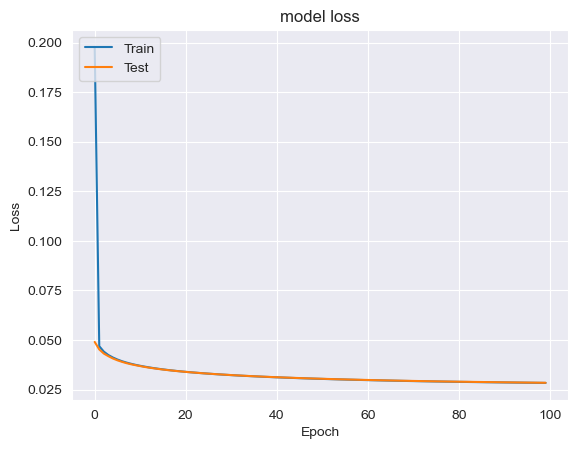

In [95]:
plot_his(history_11)

In [96]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0284 - rmse: 0.0693 - mae: 0.0284 - mse: 0.0048 - mape: 2710314.5000


[0.02842327207326889,
 0.06933432072401047,
 0.02842327207326889,
 0.004807248245924711,
 2710314.5]

In [97]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [98]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9694.314


# Model 12

In [99]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 112s 4ms/step - loss: 0.2163 - rmse: 0.3960 - mae: 0.2163 - mse: 0.1568 - mape: 44189104.0000 - val_loss: 0.1990 - val_rmse: 0.3093 - val_mae: 0.1990 - val_mse: 0.0957 - val_mape: 43144920.0000
Epoch 2/100
24872/24872 [==============================] - 113s 5ms/step - loss: 0.1993 - rmse: 0.3053 - mae: 0.1993 - mse: 0.0932 - mape: 40527548.0000 - val_loss: 0.1984 - val_rmse: 0.3091 - val_mae: 0.1984 - val_mse: 0.0956 - val_mape: 37520092.0000
Epoch 3/100
24872/24872 [==============================] - 115s 5ms/step - loss: 0.1984 - rmse: 0.3049 - mae: 0.1984 - mse: 0.0930 - mape: 39987796.0000 - val_loss: 0.1977 - val_rmse: 0.2975 - val_mae: 0.1977 - val_mse: 0.0885 - val_mape: 42380700.0000
Epoch 4/100
24872/24872 [==============================] - 128s 5ms/step - loss: 0.1979 - rmse: 0.3046 - mae: 0.1979 - mse: 0.0928 - mape: 39647380.0000 - val_loss: 0.1971 - val_rmse: 0.3048 - val_mae: 0.1971 - val_mse: 0.0929 - val_mape: 38

24872/24872 [==============================] - 111s 4ms/step - loss: 0.1961 - rmse: 0.3041 - mae: 0.1961 - mse: 0.0925 - mape: 37604788.0000 - val_loss: 0.1965 - val_rmse: 0.3029 - val_mae: 0.1965 - val_mse: 0.0917 - val_mape: 39267660.0000
Epoch 34/100
24872/24872 [==============================] - 109s 4ms/step - loss: 0.1961 - rmse: 0.3040 - mae: 0.1961 - mse: 0.0924 - mape: 37580856.0000 - val_loss: 0.1965 - val_rmse: 0.3057 - val_mae: 0.1965 - val_mse: 0.0934 - val_mape: 38230788.0000
Epoch 35/100
24872/24872 [==============================] - 110s 4ms/step - loss: 0.1961 - rmse: 0.3040 - mae: 0.1961 - mse: 0.0924 - mape: 37560232.0000 - val_loss: 0.1964 - val_rmse: 0.3063 - val_mae: 0.1964 - val_mse: 0.0938 - val_mape: 37102260.0000
Epoch 36/100
24872/24872 [==============================] - 111s 4ms/step - loss: 0.1961 - rmse: 0.3040 - mae: 0.1961 - mse: 0.0924 - mape: 37602124.0000 - val_loss: 0.1965 - val_rmse: 0.3067 - val_mae: 0.1965 - val_mse: 0.0941 - val_mape: 36082760.00

24872/24872 [==============================] - 67s 3ms/step - loss: 0.1958 - rmse: 0.3040 - mae: 0.1958 - mse: 0.0924 - mape: 37232520.0000 - val_loss: 0.1963 - val_rmse: 0.3057 - val_mae: 0.1963 - val_mse: 0.0935 - val_mape: 35470404.0000
Epoch 66/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.1958 - rmse: 0.3039 - mae: 0.1958 - mse: 0.0924 - mape: 37249228.0000 - val_loss: 0.1962 - val_rmse: 0.3045 - val_mae: 0.1962 - val_mse: 0.0927 - val_mape: 36614416.0000
Epoch 67/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.1958 - rmse: 0.3039 - mae: 0.1958 - mse: 0.0924 - mape: 37227236.0000 - val_loss: 0.1966 - val_rmse: 0.3044 - val_mae: 0.1966 - val_mse: 0.0927 - val_mape: 40032000.0000
Epoch 68/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.1958 - rmse: 0.3040 - mae: 0.1958 - mse: 0.0924 - mape: 37200076.0000 - val_loss: 0.1962 - val_rmse: 0.3061 - val_mae: 0.1962 - val_mse: 0.0937 - val_mape: 36195596.0000
E

24872/24872 [==============================] - 63s 3ms/step - loss: 0.1957 - rmse: 0.3039 - mae: 0.1957 - mse: 0.0924 - mape: 37049168.0000 - val_loss: 0.1961 - val_rmse: 0.3041 - val_mae: 0.1961 - val_mse: 0.0925 - val_mape: 36714756.0000
Epoch 98/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.1957 - rmse: 0.3038 - mae: 0.1957 - mse: 0.0923 - mape: 37038636.0000 - val_loss: 0.1962 - val_rmse: 0.3054 - val_mae: 0.1962 - val_mse: 0.0933 - val_mape: 38227596.0000
Epoch 99/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.1957 - rmse: 0.3039 - mae: 0.1957 - mse: 0.0924 - mape: 37036028.0000 - val_loss: 0.1961 - val_rmse: 0.3058 - val_mae: 0.1961 - val_mse: 0.0935 - val_mape: 36119768.0000
Epoch 100/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.1957 - rmse: 0.3039 - mae: 0.1957 - mse: 0.0924 - mape: 37001904.0000 - val_loss: 0.1962 - val_rmse: 0.3051 - val_mae: 0.1962 - val_mse: 0.0931 - val_mape: 35890676.0000


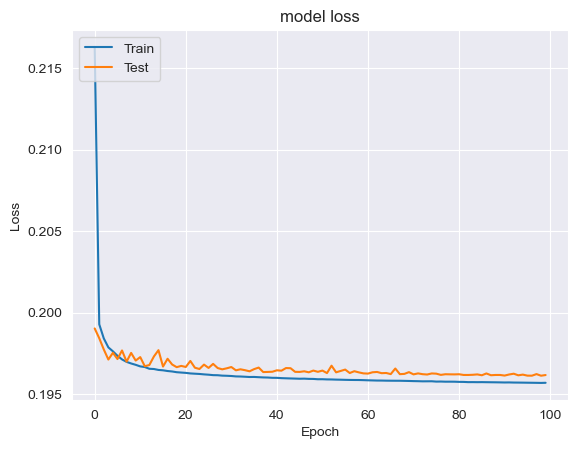

In [100]:
plot_his(history_12)

In [101]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.1962 - rmse: 0.3051 - mae: 0.1962 - mse: 0.0931 - mape: 35890676.0000


[0.1961825042963028,
 0.3050762712955475,
 0.1961825042963028,
 0.09307153522968292,
 35890676.0]

In [102]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [103]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1507.077


In [104]:
model_1.save('Saved_models/model_1_Poweresti.h5')

In [105]:
model_2.save('Saved_models/model_2_Poweresti.h5')

In [106]:
model_3.save('Saved_models/model_3_Poweresti.h5')

In [107]:
model_4.save('Saved_models/model_4_Poweresti.h5')

In [108]:
model_5.save('Saved_models/model_5_Poweresti.h5')

In [109]:
model_6.save('Saved_models/model_6_Poweresti.h5')

In [110]:
model_7.save('Saved_models/model_7_Poweresti.h5')

In [111]:
model_8.save('Saved_models/model_8_Poweresti.h5')

In [112]:
model_9.save('Saved_models/model_9_Poweresti.h5')

In [113]:
model_10.save('Saved_models/model_10_Poweresti.h5')

In [114]:
model_11.save('Saved_models/model_11_Poweresti.h5')

In [115]:
model_12.save('Saved_models/model_12_Poweresti.h5')

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(Y_pred_2[:200],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(df['Time'],df["SOC"],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')